# Project Code



```
# This is formatted as code
```

# main

In [1]:
install.packages("tidyverse")
install.packages("GGally")
library(tidyverse);

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘labelled’, ‘broom.helpers’, ‘patchwork’, ‘Rcpp’, ‘ggstats’, ‘plyr’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
library(tidyverse);
library(dplyr)
library(tidyr)
library(ggplot2)
library(GGally)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



- Sleep efficiency between 0.5 and 1??
- students my ass, these guys are like 40+
- most get between 7-8 hours of sleep

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


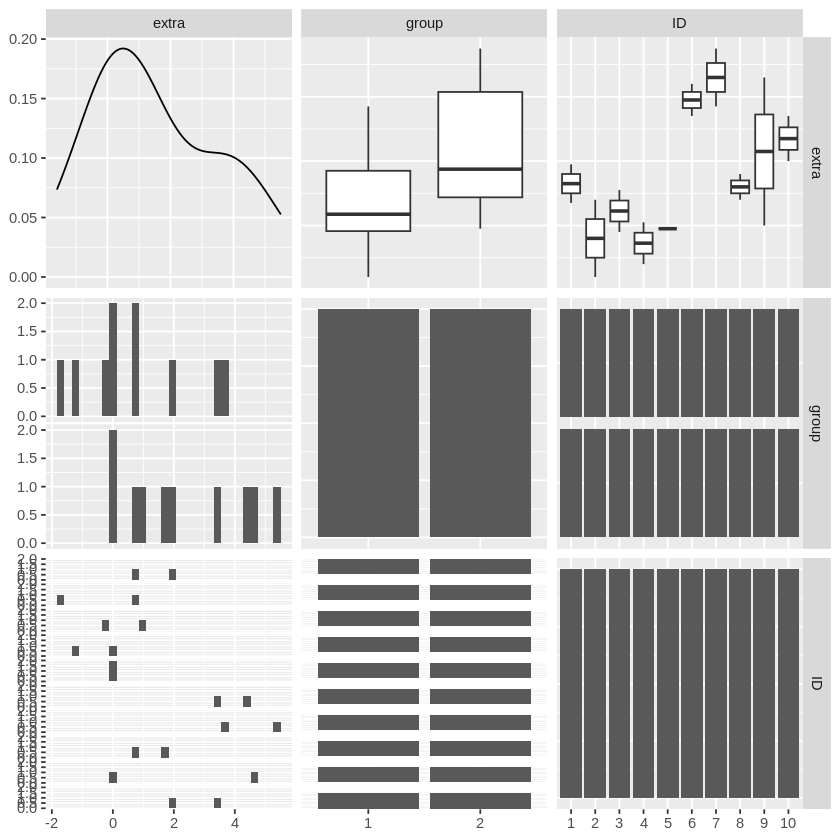

In [3]:
ggpairs(sleep)
ggsave("output.png",width = 30, height = 30, units = "in")

In [4]:
sleep <- read_csv("Sleep_Efficiency.csv", name_repair = make.names) |>
    select(-ID) |>
    mutate(across(c(Gender,Smoking.status), as.factor))

length(sleep$Bedtime) # num rows
sleep <- na.omit(sleep)
length(sleep$Bedtime) # num rows

Rows: 452 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (2): Gender, Smoking.status
dbl  (11): ID, Age, Sleep.duration, Sleep.efficiency, REM.sleep.percentage, ...
dttm  (2): Bedtime, Wakeup.time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 452

[1] 388

In [5]:
#I guess
logit <- function(data) {
  log(data/(1-data));
}

post_midnight <- function(dt) {
    hourtime <- hour(dt);
    minutetime <- minute(dt)/60.0;
    ifelse (hourtime > 12, hourtime+minutetime-24, hourtime+minutetime);
}

year <- c()
month <- c()
day <- c()
n <- length(sleep$Bedtime)

for (i in 1:n) {
    time <- strptime(sleep$Bedtime[i], format = "%Y-%m-%d")

    # Debugging information
    if (is.na(time)) {
        print(paste("Invalid date-time value at index", i, ":", sleep$Bedtime[i]))
    }

    year <- append(year, as.numeric(format(time, "%Y")))
    month <- append(month, as.numeric(format(time, "%m")))
    day <- append(day, as.numeric(format(time, "%d")))
}

sleep$Month <- month
sleep$Day <- day

sleep_funny_time <- sleep |>
    mutate(bed_post_midnight = post_midnight(Bedtime), wake_post_midnight = post_midnight(Wakeup.time)) |>
    select(-Bedtime, - Wakeup.time) |>
    mutate(SleepEfficiency = logit(Sleep.efficiency)) |>
    select(-Sleep.efficiency);

unscaled_sleep_funny_time <- sleep |>
    mutate(bed_post_midnight = post_midnight(Bedtime), wake_post_midnight = post_midnight(Wakeup.time)) |>
    select(-Bedtime, - Wakeup.time) |>
    mutate(SleepEfficiency = logit(Sleep.efficiency)) |>
    mutate(unscaled_sleep_eff = Sleep.efficiency) |>
    select(-Sleep.efficiency);

# sleep_funny_time

full_model <- lm(SleepEfficiency ~ ., data=sleep_funny_time)
summary(full_model)


Call:
lm(formula = SleepEfficiency ~ ., data = sleep_funny_time)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.19761 -0.34559 -0.02143  0.30535  2.45900 

Coefficients: (2 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -1.2013042  0.3520480  -3.412 0.000715 ***
Age                     0.0071467  0.0020250   3.529 0.000469 ***
GenderMale             -0.0323643  0.0575177  -0.563 0.573987    
Sleep.duration          0.0232732  0.0290973   0.800 0.424310    
REM.sleep.percentage    0.0454338  0.0077465   5.865 9.88e-09 ***
Deep.sleep.percentage   0.0302823  0.0019613  15.440  < 2e-16 ***
Light.sleep.percentage         NA         NA      NA       NA    
Awakenings             -0.2683162  0.0207474 -12.933  < 2e-16 ***
Caffeine.consumption    0.0017023  0.0009311   1.828 0.068308 .  
Alcohol.consumption    -0.0376707  0.0173689  -2.169 0.030723 *  
Smoking.statusYes      -0.2813055  0.0568654  -4

In [6]:
head(sleep)
head(sleep_funny_time)

Age,Gender,Bedtime,Wakeup.time,Sleep.duration,Sleep.efficiency,REM.sleep.percentage,Deep.sleep.percentage,Light.sleep.percentage,Awakenings,Caffeine.consumption,Alcohol.consumption,Smoking.status,Exercise.frequency,Month,Day
<dbl>,<fct>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6,0.88,18,70,12,0,0,0,Yes,3,3,6
69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7,0.66,19,28,53,3,0,3,Yes,3,12,5
40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8,0.89,20,70,10,1,0,0,No,3,5,25
40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6,0.51,23,25,52,3,50,5,Yes,1,11,3
57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8,0.76,27,55,18,3,0,3,No,3,3,13
27,Female,2021-07-21 21:00:00,2021-07-21 03:00:00,6,0.54,28,25,47,2,50,0,Yes,1,7,21


Age,Gender,Sleep.duration,REM.sleep.percentage,Deep.sleep.percentage,Light.sleep.percentage,Awakenings,Caffeine.consumption,Alcohol.consumption,Smoking.status,Exercise.frequency,Month,Day,bed_post_midnight,wake_post_midnight,SleepEfficiency
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
65,Female,6,18,70,12,0,0,0,Yes,3,3,6,1.0,7.0,1.99243016
69,Male,7,19,28,53,3,0,3,Yes,3,12,5,2.0,9.0,0.66329422
40,Female,8,20,70,10,1,0,0,No,3,5,25,-2.5,5.5,2.09074110
40,Female,6,23,25,52,3,50,5,Yes,1,11,3,2.5,8.5,0.04000533
57,Male,8,27,55,18,3,0,3,No,3,3,13,1.0,9.0,1.15267951
27,Female,6,28,25,47,2,50,0,Yes,1,7,21,-3.0,3.0,0.16034265


In [7]:
install.packages("leaps")
library(leaps)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [8]:
# subsets <- regsubsets(SleepEfficiency ~ . , data=sleep_funny_time, method="exhaustive")
#summary(subsets)$which
# subsets <- regsubsets(SleepEfficiency ~ . - REM.sleep.percentage -Deep.sleep.percentage - wake_post_midnight, data=sleep_funny_time, method="exhaustive")
# subsets <- regsubsets(SleepEfficiency ~ . - Deep.sleep.percentage - wake_post_midnight +
#                        Smoking.status * Caffeine.consumption + Smoking.status * Alcohol.consumption + Smoking.status * Age +
#                        Smoking.status * Awakenings + Smoking.status * Light.sleep.percentage + Smoking.status * Exercise.frequency +
#                          Smoking.status * Sleep.duration + Smoking.status * REM.sleep.percentage + Smoking.status * bed_post_midnight,
#                        data=sleep_funny_time, method="exhaustive")

subsets <- regsubsets(SleepEfficiency ~ . - Deep.sleep.percentage - wake_post_midnight #+ Smoking.status * Caffeine.consumption + Smoking.status * Alcohol.consumption + Smoking.status * Light.sleep.percentage
                     ,
                       data=sleep_funny_time, method="exhaustive", nvmax=14)
summary(subsets)$which

,(Intercept),Age,GenderMale,Sleep.duration,REM.sleep.percentage,Light.sleep.percentage,Awakenings,Caffeine.consumption,Alcohol.consumption,Smoking.statusYes,Exercise.frequency,Month,Day,bed_post_midnight
1,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
3,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
4,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
5,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
6,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE
7,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE
8,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE
9,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE
10,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE


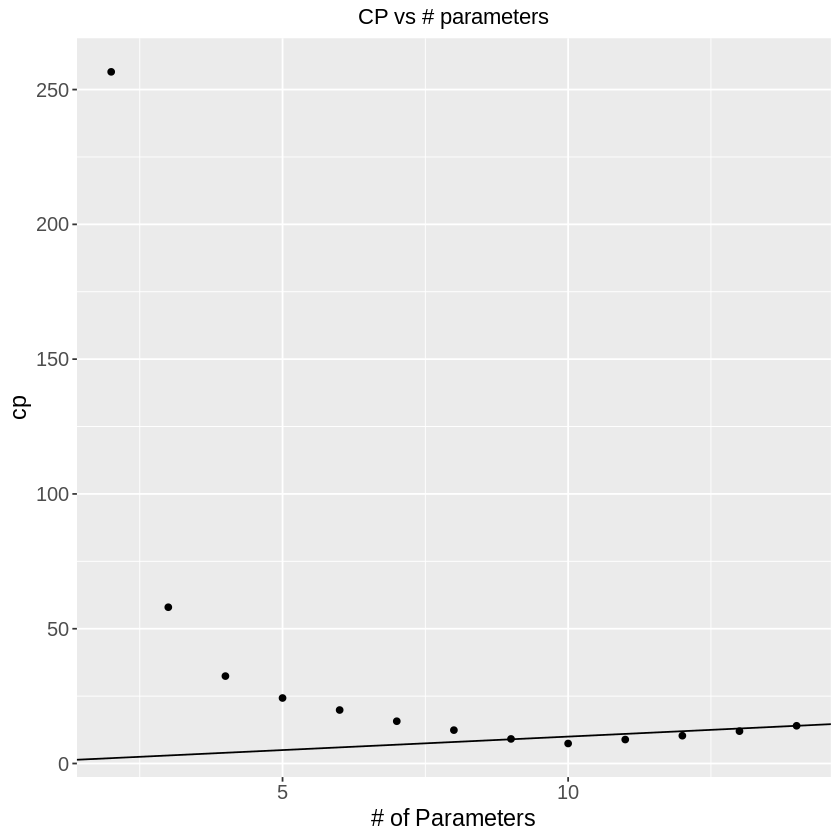

In [9]:
ss <- summary(subsets)
cps <- tibble(cp = ss$cp, p = 2:14);
ggplot(cps, aes(p, cp)) +
  geom_point() +
  geom_abline(slope = 1, intercept = 0) +
  labs(x="# of Parameters", ylab = "CP", title = "CP vs # parameters") +
  theme(axis.text = element_text(size = 12),  plot.title=element_text(hjust=0.5), axis.title = element_text(size = 14))

(Intercept)                    Age   REM.sleep.percentage 
           2.036813476            0.005920506            0.017821676 
Light.sleep.percentage             Awakenings    Alcohol.consumption 
          -0.030009605           -0.276200213           -0.040440629 
     Smoking.statusYes     Exercise.frequency                    Day 
          -0.294270778            0.048536138            0.006519884


Call:
lm(formula = SleepEfficiency ~ Age + REM.sleep.percentage + Light.sleep.percentage + 
    Awakenings + Caffeine.consumption + Alcohol.consumption + 
    Smoking.status + Exercise.frequency, data = sleep_funny_time)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.16676 -0.34840 -0.01278  0.30346  2.47982 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             2.1065227  0.1967375  10.707  < 2e-16 ***
Age                     0.0066867  0.0019343   3.457 0.000608 ***
REM.sleep.percentage    0.0153473  0.0074666   2.055 0.040520 *  
Light.sleep.percentage -0.0296926  0.0019480 -15.243  < 2e-16 ***
Awakenings             -0.2710004  0.0205671 -13.176  < 2e-16 ***
Caffeine.consumption    0.0017331  0.0009069   1.911 0.056766 .  
Alcohol.consumption    -0.0392825  0.0173623  -2.263 0.024231 *  
Smoking.statusYes      -0.2989317  0.0548272  -5.452 8.98e-08 ***
Exercise.frequency      0.0522119  0.0183513   2.845 0.004680 ** 

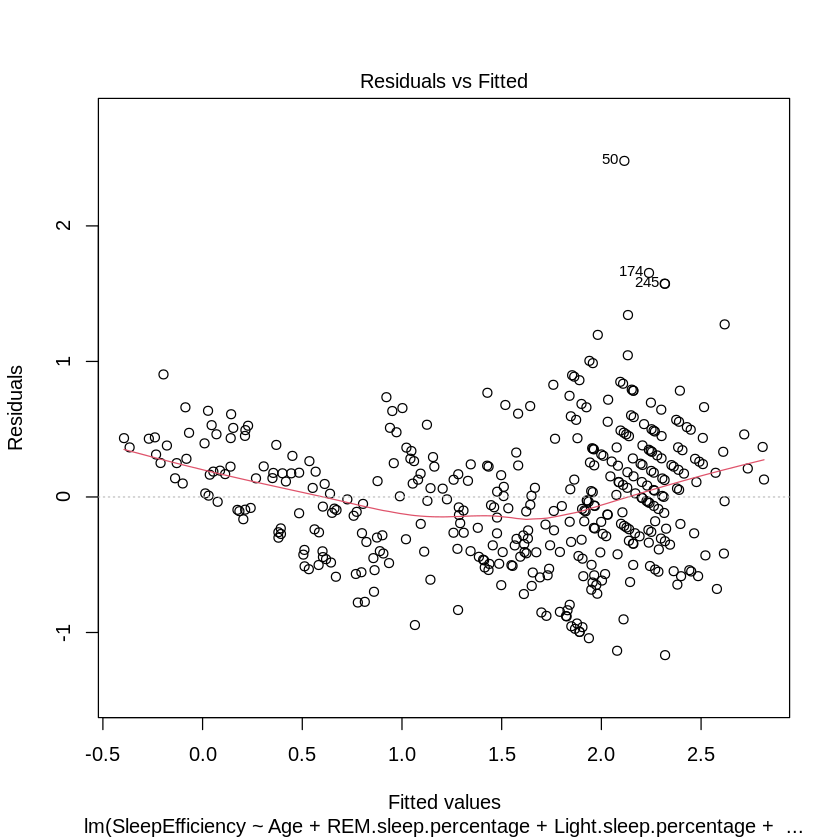

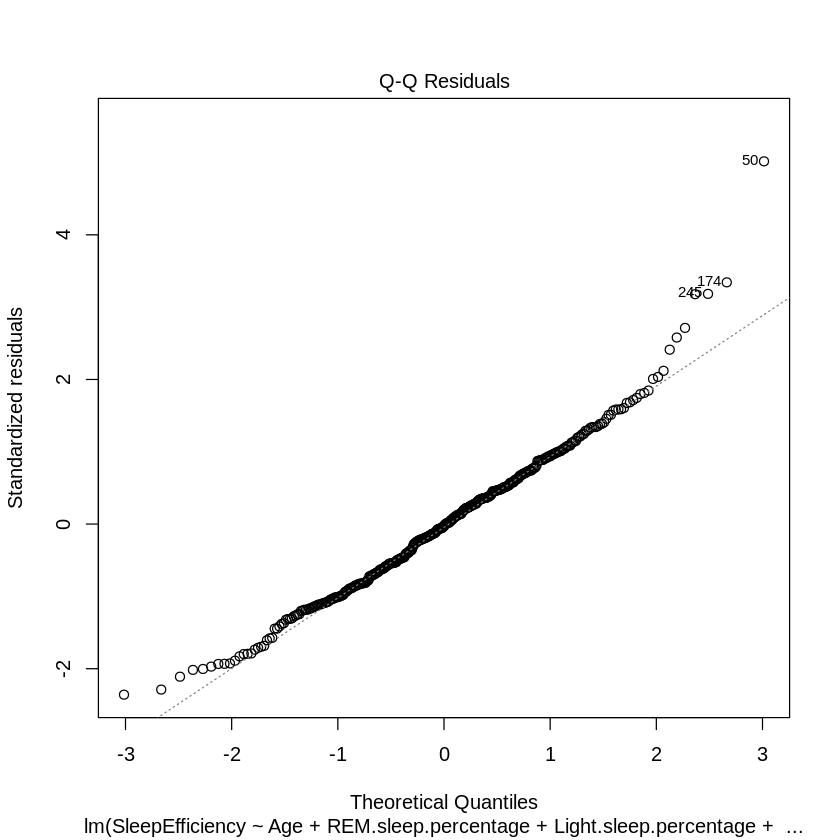

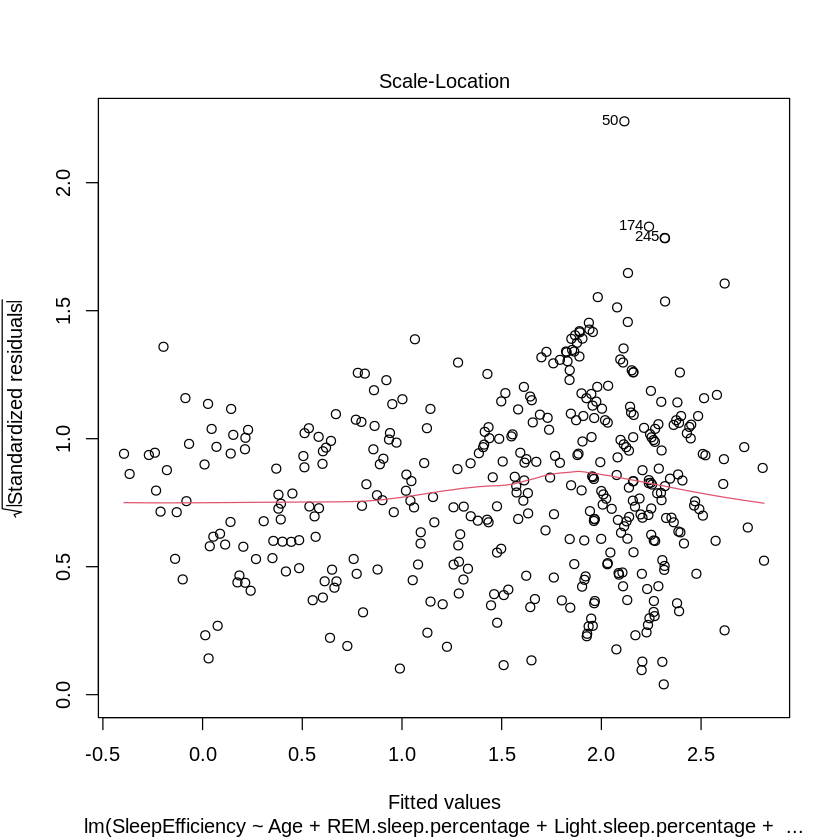

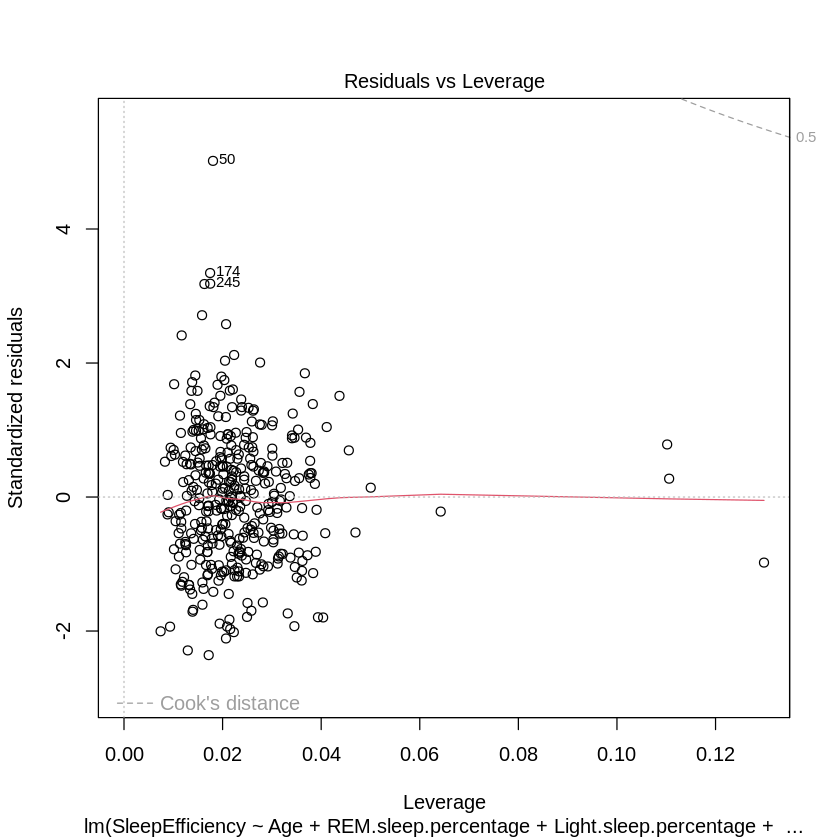

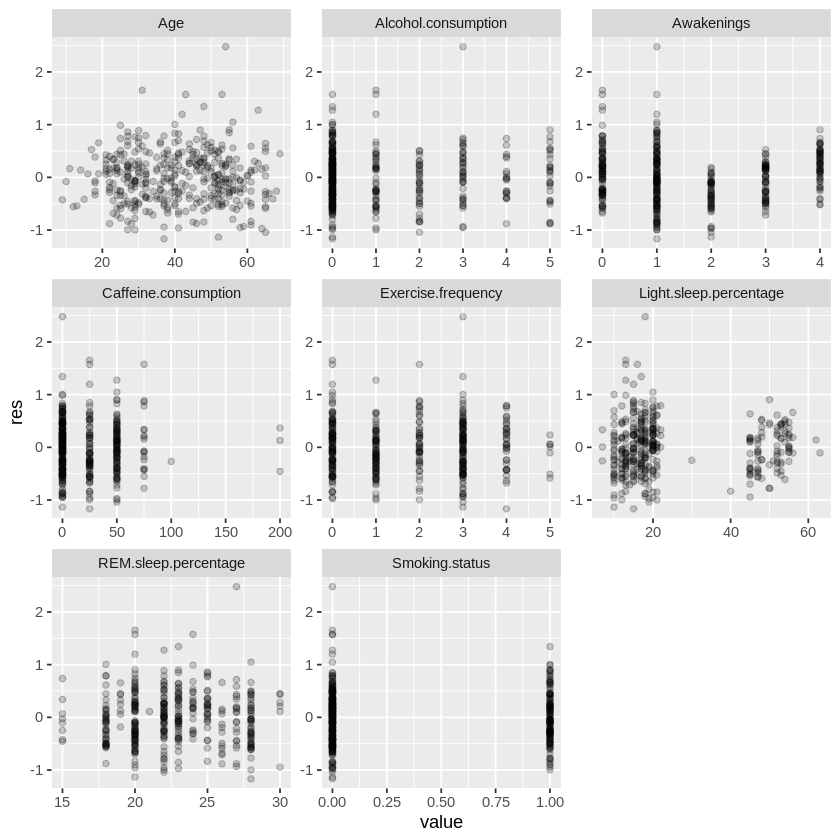

In [10]:
coef(subsets, 8);
m8 <- lm(SleepEfficiency ~ Age + REM.sleep.percentage + Light.sleep.percentage + Awakenings + Caffeine.consumption + Alcohol.consumption + Smoking.status +Exercise.frequency, data = sleep_funny_time);
summary(m8);
plot(m8);
sleep_funny_time |>
  select(Age, REM.sleep.percentage, Light.sleep.percentage, Awakenings, Caffeine.consumption, Alcohol.consumption, Smoking.status, Exercise.frequency) |>
  mutate(Smoking.status = ifelse(Smoking.status == "Yes", 1, 0)) |>
  bind_cols(tibble(res=m8$residuals)) |>
  pivot_longer(!res,names_to = "var", values_to = "value") |>
  ggplot(aes(value, res)) +
    geom_point(alpha=0.2) +
    facet_wrap(vars(var), scales = "free")

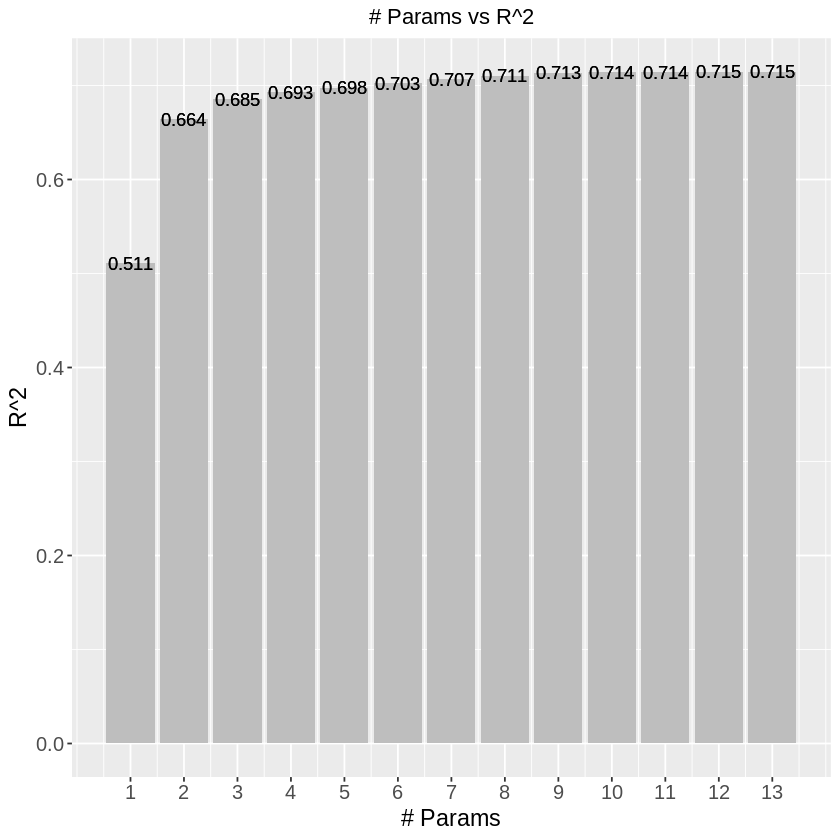

In [11]:
r2 <- data.frame(
  params = seq(length(ss$rsq)),
  rsq = ss$rsq
)

ggplot(r2, aes(x = params, y = rsq)) +
  geom_bar(stat="identity", fill = "gray") +
  geom_text(aes(label=round(rsq, 3))) +
  geom_text(aes(label=round(rsq, 3))) +
  labs(x = "# Params", y="R^2",title="# Params vs R^2") +
  scale_x_continuous(breaks=r2$params, labels=r2$params) +
  theme(axis.text = element_text(size = 12),  plot.title=element_text(hjust=0.5), axis.title = element_text(size = 14))

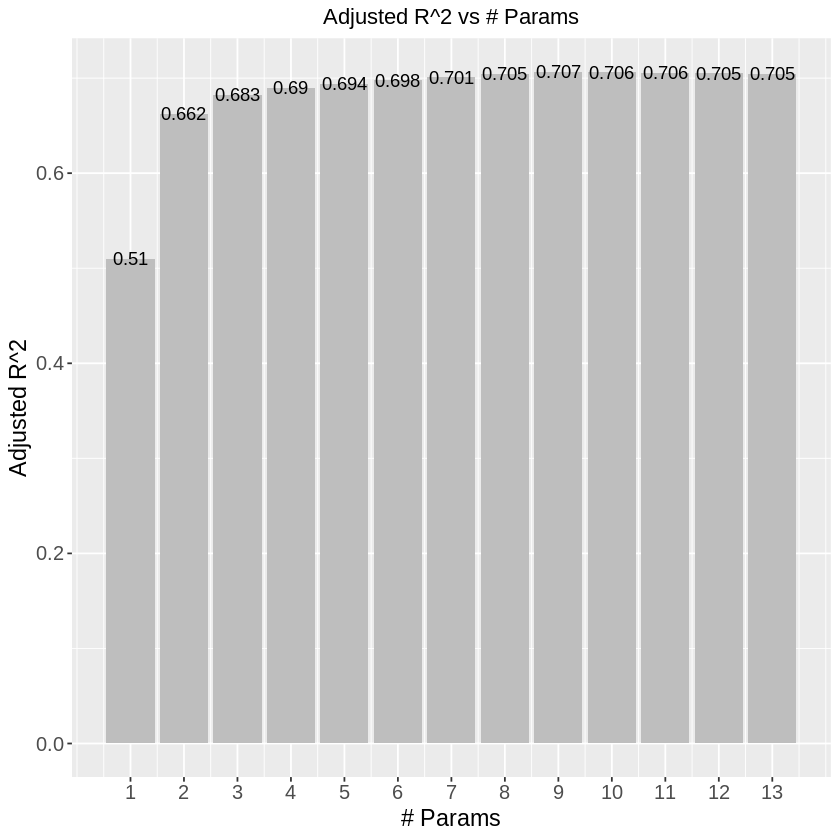

In [12]:
adjr2 <- data.frame(
  params = seq(length(ss$rsq)),
  adjr2 = ss$adjr2
)

ggplot(adjr2, aes(x = params, y = adjr2)) +
  geom_bar(stat="identity", fill = "gray") +
  geom_text(aes(label=round(adjr2, 3))) +
  labs(x = "# Params", y="Adjusted R^2", title="Adjusted R^2 vs # Params") +
  scale_x_continuous(breaks=adjr2$params, labels=adjr2$params) +
  theme(axis.text = element_text(size = 12),  plot.title=element_text(hjust=0.5), axis.title = element_text(size = 14))

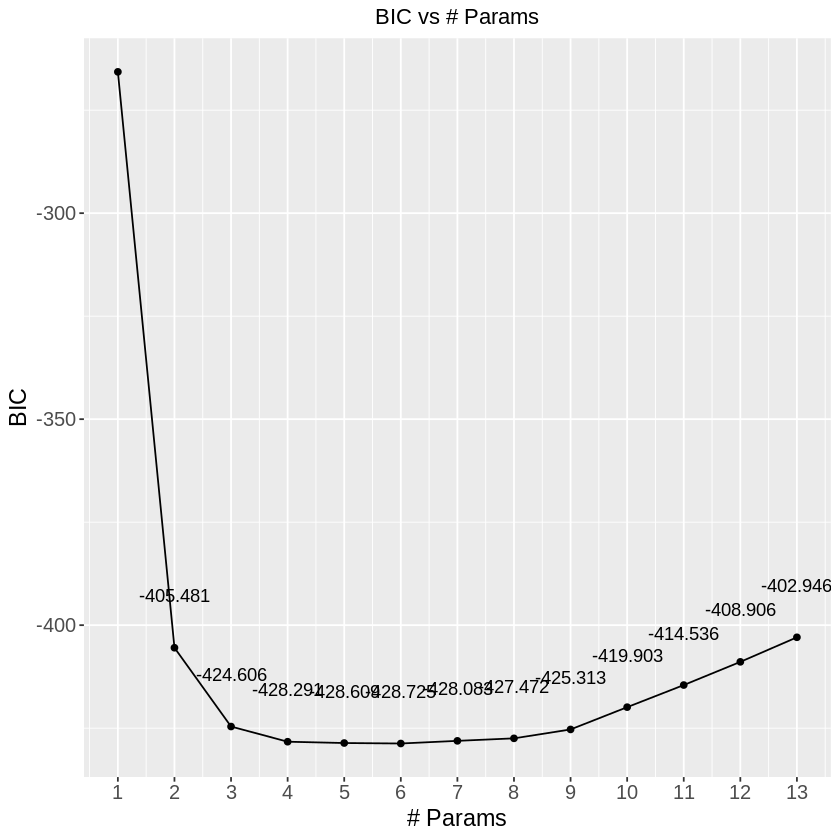

In [13]:
bics <- data.frame(
  params = seq(length(ss$bic)),
  bic = ss$bic
)

ggplot(bics, aes(x = params, y = bic)) +
  geom_point() +
  geom_line() +
  geom_text(aes(label=round(bic, 3)), vjust=-3.5) +
  labs(x = "# Params", y="BIC", title="BIC vs # Params") +
  scale_x_continuous(breaks=bics$params, labels=bics$params) +
  theme(axis.text = element_text(size = 12),  plot.title=element_text(hjust=0.5),
         axis.title = element_text(size = 14))

In [16]:
m6 <- lm(SleepEfficiency ~ Light.sleep.percentage +  Awakenings + Smoking.status + Exercise.frequency + Caffeine.consumption + Smoking.status * Light.sleep.percentage, data=sleep_funny_time)
summary(m6)
AIC(m6)



Call:
lm(formula = SleepEfficiency ~ Light.sleep.percentage + Awakenings + 
    Smoking.status + Exercise.frequency + Caffeine.consumption + 
    Smoking.status * Light.sleep.percentage, data = sleep_funny_time)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1810 -0.3432 -0.0178  0.3287  2.5548 

Coefficients:
                                           Estimate Std. Error t value Pr(>|t|)
(Intercept)                               2.6339249  0.0867506  30.362  < 2e-16
Light.sleep.percentage                   -0.0279902  0.0024985 -11.203  < 2e-16
Awakenings                               -0.2712380  0.0208735 -12.994  < 2e-16
Smoking.statusYes                        -0.0857768  0.1061084  -0.808  0.41937
Exercise.frequency                        0.0604708  0.0188352   3.211  0.00144
Caffeine.consumption                      0.0016225  0.0009018   1.799  0.07279
Light.sleep.percentage:Smoking.statusYes -0.0078477  0.0035050  -2.239  0.02573
                                      

[1] 583.9067

In [17]:
m7 <- lm(SleepEfficiency ~ Age + REM.sleep.percentage + Light.sleep.percentage +  Awakenings - Smoking.status + Exercise.frequency + Caffeine.consumption + Smoking.status * Light.sleep.percentage, data=sleep_funny_time)
# m7 <- lm(Sleep.efficiency ~ Age + Light.sleep.percentage +  Awakenings + Alcohol.consumption + Smoking.status + Exercise.frequency + Caffeine.consumption, data=sleep)
summary(m7)
AIC(m7)



Call:
lm(formula = SleepEfficiency ~ Age + REM.sleep.percentage + Light.sleep.percentage + 
    Awakenings - Smoking.status + Exercise.frequency + Caffeine.consumption + 
    Smoking.status * Light.sleep.percentage, data = sleep_funny_time)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.12756 -0.34203 -0.02519  0.32657  2.41152 

Coefficients:
                                           Estimate Std. Error t value Pr(>|t|)
(Intercept)                               2.0015724  0.2030342   9.858  < 2e-16
Age                                       0.0061526  0.0019290   3.189  0.00154
REM.sleep.percentage                      0.0166759  0.0074751   2.231  0.02628
Light.sleep.percentage                   -0.0274947  0.0024602 -11.176  < 2e-16
Awakenings                               -0.2725051  0.0205128 -13.285  < 2e-16
Exercise.frequency                        0.0556505  0.0185477   3.000  0.00287
Caffeine.consumption                      0.0018568  0.0009048   2.052  0.04084

[1] 572.2428

In [18]:
sm7 <- lm(unscaled_sleep_eff ~ Age + Light.sleep.percentage +  Awakenings + Smoking.status + Exercise.frequency + Caffeine.consumption + Smoking.status * Light.sleep.percentage, data=unscaled_sleep_funny_time)
# m7 <- lm(Sleep.efficiency ~ Age + Light.sleep.percentage +  Awakenings + Alcohol.consumption + Smoking.status + Exercise.frequency + Caffeine.consumption, data=sleep)
summary(sm7)
AIC(sm7)



Call:
lm(formula = unscaled_sleep_eff ~ Age + Light.sleep.percentage + 
    Awakenings + Smoking.status + Exercise.frequency + Caffeine.consumption + 
    Smoking.status * Light.sleep.percentage, data = unscaled_sleep_funny_time)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.180977 -0.037265  0.007161  0.041540  0.154926 

Coefficients:
                                           Estimate Std. Error t value Pr(>|t|)
(Intercept)                               0.9179402  0.0138131  66.454  < 2e-16
Age                                       0.0008582  0.0002271   3.778 0.000183
Light.sleep.percentage                   -0.0046942  0.0002893 -16.228  < 2e-16
Awakenings                               -0.0316198  0.0024165 -13.085  < 2e-16
Smoking.statusYes                         0.0151558  0.0122987   1.232 0.218593
Exercise.frequency                        0.0081926  0.0021835   3.752 0.000203
Caffeine.consumption                      0.0002712  0.0001058   2.563 0.010747


[1] -1088.369

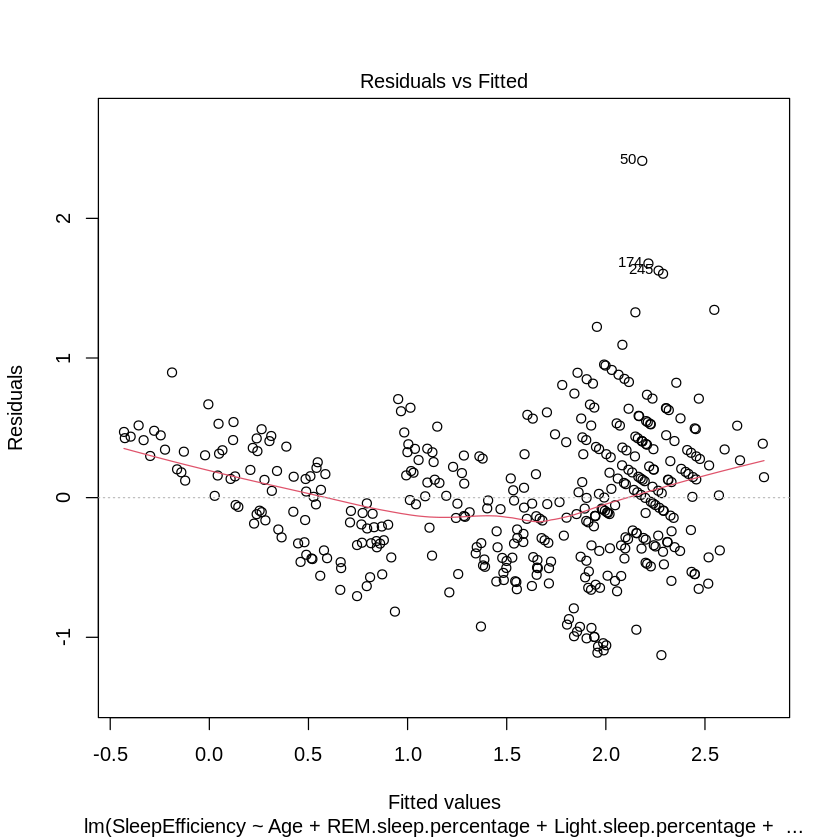

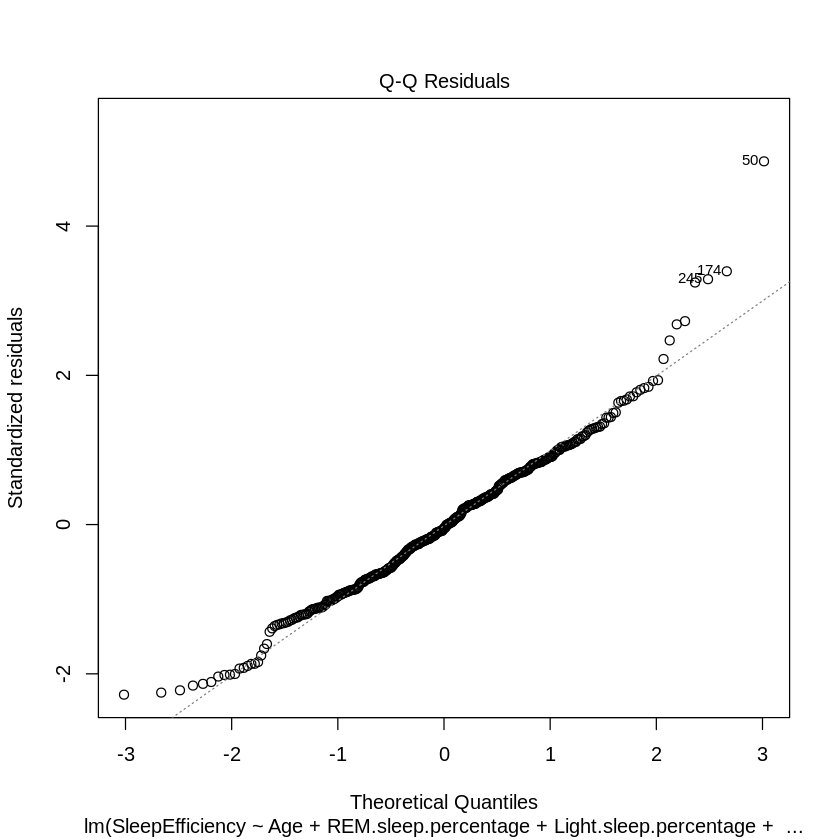

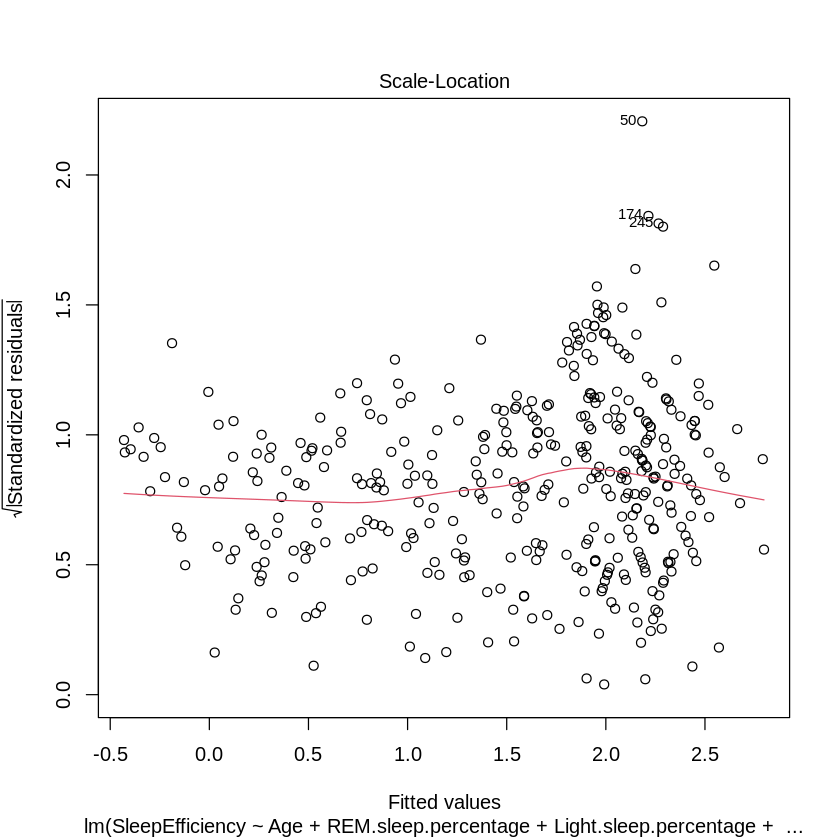

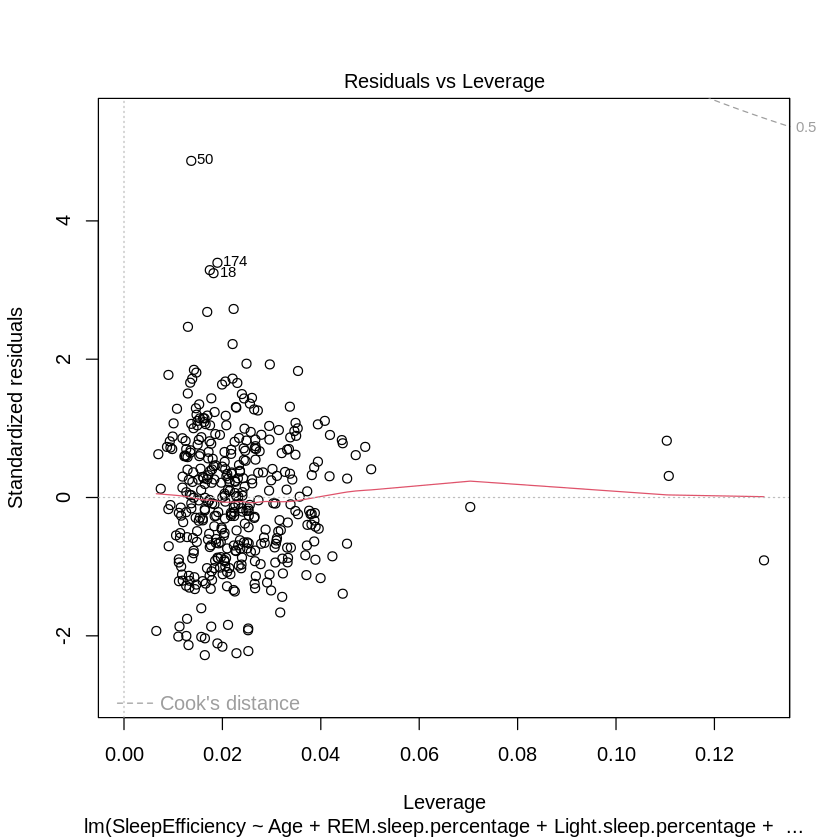

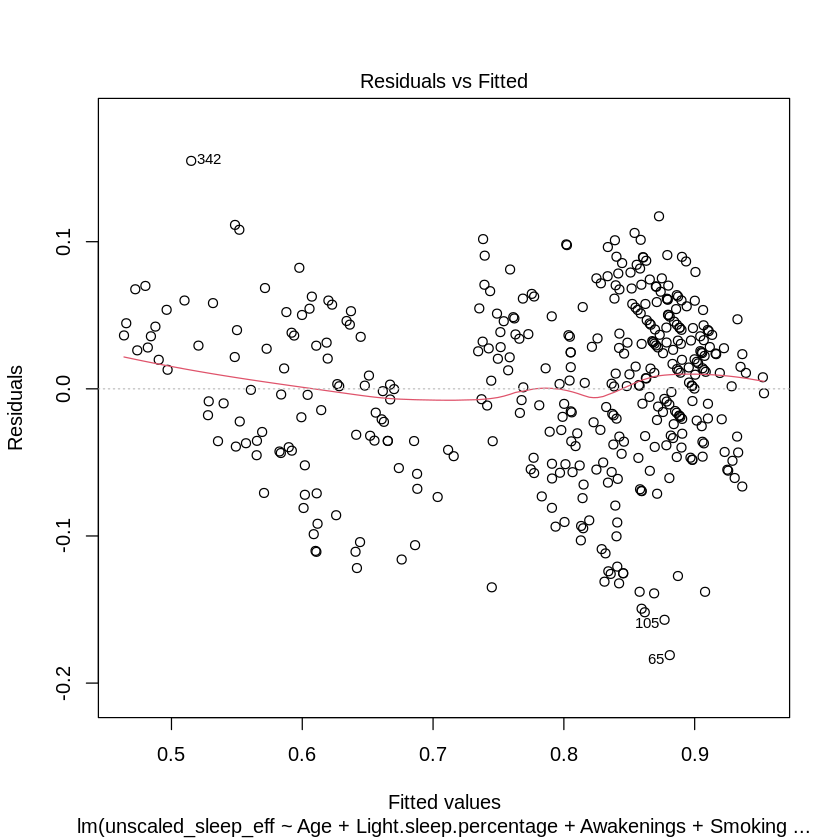

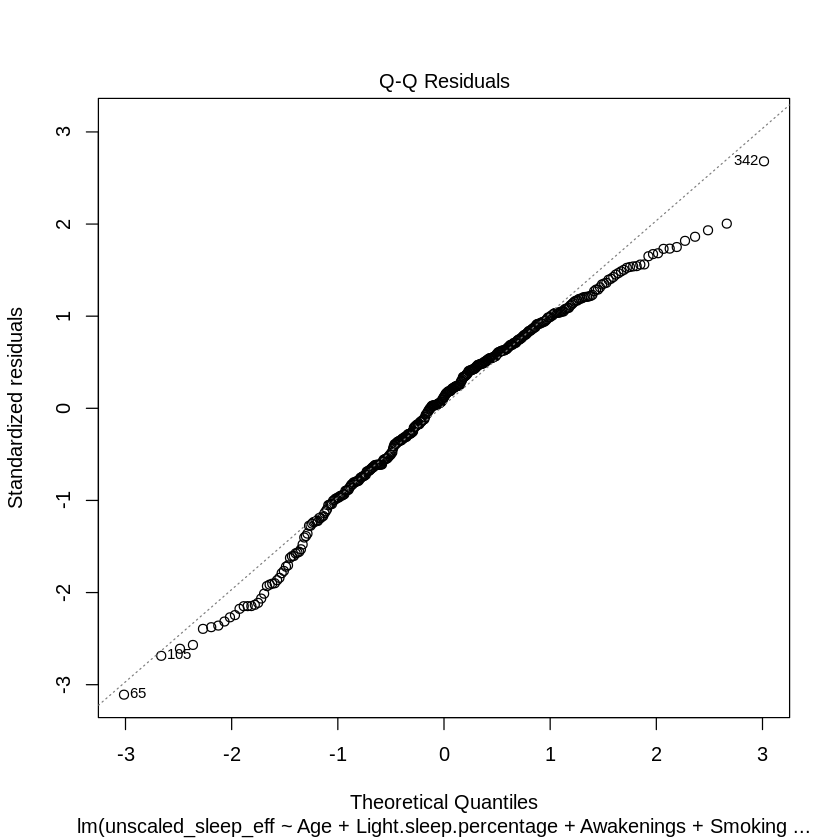

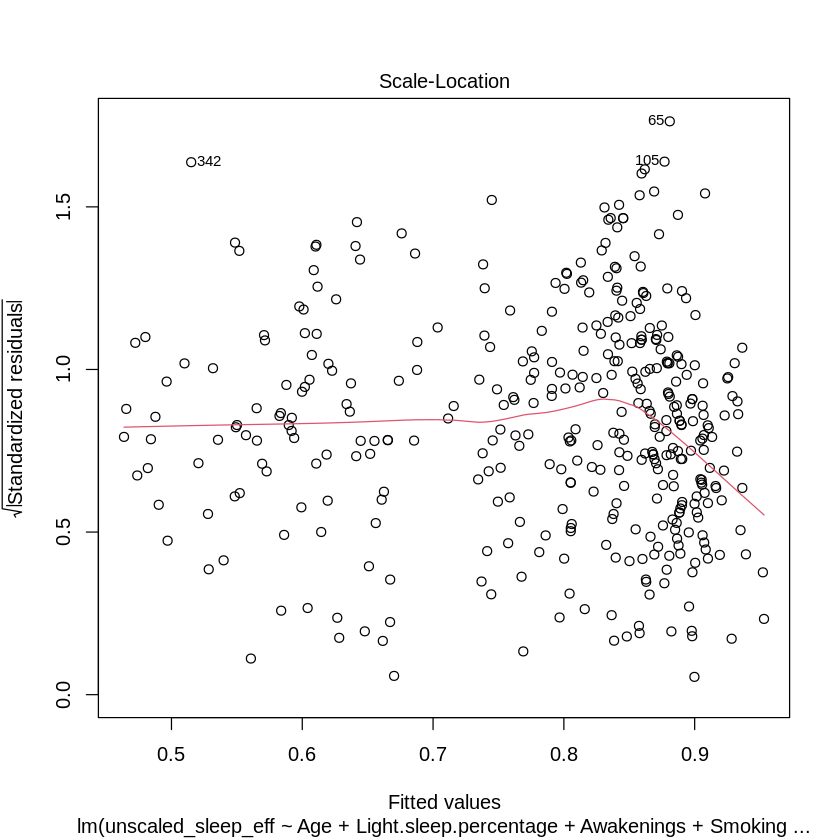

ERROR: ignored

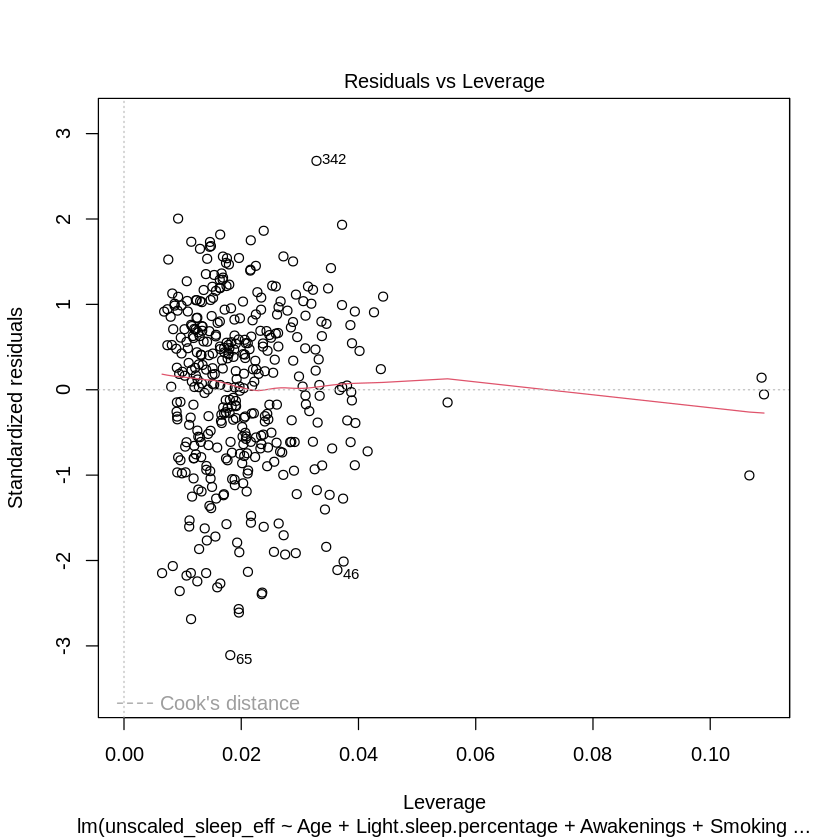

In [19]:
plot(m7);
plot(sm7);
plot(sqrt_m7);
plot(log_m7);

In [ ]:
sleep_funny_time |>
  select(Age, Light.sleep.percentage, Awakenings, Smoking.status, Exercise.frequency, Caffeine.consumption, SleepEfficiency) |>
  mutate(Smoking.status = ifelse(Smoking.status == "Yes", 1, 0)) |>
  cor()

In [ ]:
sleep_funny_time |>
  select(Age, Light.sleep.percentage, Awakenings, Smoking.status, Exercise.frequency, Caffeine.consumption) |>
  mutate(Smoking.status = ifelse(Smoking.status == "Yes", 1, 0)) |>
  bind_cols(tibble(res=m7$residuals)) |>
  pivot_longer(!res,names_to = "var", values_to = "value") |>
  ggplot(aes(value, res)) +
    geom_point(alpha=0.2) +
    facet_wrap(vars(var), scales = "free")

According to this stuff the model with model with 6 params is probably the best?
- CP closest to P, AIC is the lowest
- Models fit better with a log transform (slightly)
  - IMO not worth it rather keep it easy to interpret

Model 7 has marginally better RSE and Adjr R^2 and all of the parameters are still significant, but not by enough to use the bigger model

In [ ]:
null <- lm(log(Sleep.efficiency) ~ 1, data=na.omit(sleep))
full_model <- lm(log(Sleep.efficiency) ~ ., data=na.omit(sleep))
#null <- lm(Sleep.efficiency ~ 1, data=na.omit(sleep))
#full_model <- lm(Sleep.efficiency ~ ., data=na.omit(sleep))
# Log fits better
forward_model <- step(null, scope=formula(full_model), direction="forward")

In [ ]:
summary(forward_model)
forward_model

Forward Selection gives us the 7 param model

In [ ]:
backward_model <- step(full_model, direction="backward", scope=formula(full_model), trace=0)
summary(backward_model)

Gives the 8 param model

In [ ]:
both <- step(full_model, direction="both", scope=formula(full_model), trace=0)
summary(both)

Same as backward

In [ ]:
titles <- c(
   Age = "Age (years)",
   Gender = "Gender (Male or Female)",
   bed_post_midnight = "Bedtime",
  `wake_post_midnight` = "Wake-up time",
  `Sleep.duration` = "Sleep duration (hours)",
  `REM.sleep.percentage` = "REM sleep % (0-100)",
  `Deep.sleep.percentage` = "Deep sleep % (0-100)",
  `Light.sleep.percentage` = "Light sleep % (0-100)",
  `Awakenings` = "# Awakenings",
  `Caffeine.consumption` = "Caffeine consumed (mg)",
  `Alcohol.consumption` = "Alcohol consumed (oz)",
  `Whether the subject smokes` = "Smokes (true or false)",
  `Exercise.frequency` = "# Times Exercised",
  `Sleep.efficiency` = "Sleep efficiency (0-1)",
  `SleepEfficiency` = "Logit(Sleep Efficiency)",
   Day = "Day (1-31)",
   Month = "Month (1-12)"
)

titles2 <- c(
   Age = "Age",
   Gender = "Gender",
   bed_post_midnight = "Bedtime",
  `wake_post_midnight` = "Wake-up time",
  `Sleep.duration` = "Sleep duration",
  `REM.sleep.percentage` = "REM sleep",
  `Deep.sleep.percentage` = "Deep sleep",
  `Light.sleep.percentage` = "Light sleep",
  `Awakenings` = "# Awakenings",
  `Caffeine.consumption` = "Caffeine consumed",
  `Alcohol.consumption` = "Alcohol consumed",
  `Whether the subject smokes` = "Smokes",
  `Exercise.frequency` = "# Times Exercised",
  `Sleep.efficiency` = "Sleep efficiency ",
  `SleepEfficiency` = "Logit(Sleep Efficiency)",
   Day = "Day (1-31)",
   Month = "Month (1-12)"
)

y_titles <- c(
   Age = "Age (years)",
   Gender = "Gender (Male or Female)",
   bed_post_midnight = "Bedtime",
  `wake_post_midnight` = "Wake-up time",
  `Sleep.duration` = "Sleep duration (hours)",
  `REM.sleep.percentage` = "REM sleep % (0-100)",
  `Deep.sleep.percentage` = "Deep sleep % (0-100)",
  `Light.sleep.percentage` = "Light sleep % (0-100)",
  `Awakenings` = "# Awakenings",
  `Caffeine.consumption` = "Caffeine consumed in past 24 hours (mg)",
  `Alcohol.consumption` = "Alcohol consumed in past 24 hours (oz)",
  `Whether the subject smokes` = "Whether the subject smokes (true or false)",
  `Exercise.frequency` = "# Times Exercised in the last week",
  `Sleep.efficiency` = "Sleep efficiency (0-1)",
  `SleepEfficiency` = "Log(Sleep.efficiency / 1 - Sleep.efficiency)",
   Day = "Day (1-31)",
   Month = "Month (1-12)"
)

SeT <- sleep_funny_time$SleepEfficiency

library(car)

# Select numeric columns
numeric_columns <- sleep_funny_time %>%
  select(where(is.numeric))

# Iterate over each numeric column, create a separate plot, and save it
for (col in colnames(numeric_columns)) {
  plot_data <- numeric_columns %>%
    select(col) %>%
    gather(key = "key", value = "value")

  p <- ggplot(plot_data, aes(x = value)) +
    geom_histogram(bins = 40) +
    ggtitle(paste("Distribution of", titles[col])) +
    ylab("Count") +
    xlab(y_titles[col]) +  # Set custom x-axis title
    theme(text = element_text(size = 15), plot.title=element_text(hjust=0.5))

  p2 <- ggplot(plot_data, aes(x = value, y=SeT)) +
        geom_point() +
        ggtitle(paste(titles2[col], "vs Logit(Sleep Efficiency)")) +
        xlab(y_titles[col]) +  # Set custom y-axis title
        ylab("Logit(Sleep Efficiency)") +
        theme(text = element_text(size = 15), plot.title=element_text(hjust=0.5))
  ggsave(paste0("plot_", gsub("\\.", "", col), ".png"), plot = p)
  ggsave(paste0("plot_", gsub("\\.", "", col), "vsSE.png"), plot = p2)
}

In [ ]:
cnames <- colnames(numeric_columns)
i <- 1
for (col in numeric_columns) {
    sd <- round(sd(col), 2)
    s <- summary(col)
    cor <- round(cor(SeT, col), 2)
    cov <- round(cov(SeT, col), 2)
    print(cnames[i])
    print(s)
    print(sd)
    print(cor)
    print(cov)
    i <- i + 1
}


# Other


In [ ]:
install.packages("glmnet");

In [ ]:
library(glmnet);

In [ ]:
no_na_sleep_funny_time <- drop_na(sleep_funny_time) |>
  mutate(REM.sleep.percentage = REM.sleep.percentage/100) |>
  mutate(Light.sleep.percentage = Light.sleep.percentage/100) |>
  mutate(Deep.sleep.percentage = Deep.sleep.percentage/100) |>
  mutate(Age = Age/40) |>
  mutate(Caffeine.consumption = Caffeine.consumption/200) |>
  mutate(Alcohol.consumption = Alcohol.consumption/40)
X <- model.matrix(SleepEfficiency ~.+ Smoking.status * Caffeine.consumption +Smoking.status * Alcohol.consumption-1, no_na_sleep_funny_time)
Y <- no_na_sleep_funny_time$SleepEfficiency
lasso <- cv.glmnet(x=X, y=Y);

In [ ]:
coef(lasso, "lambda.min");
coef(lasso, "lambda.1se");

In [ ]:
install.packages("tidyverse")
install.packages("corrplot")
install.packages("ggplot2")
install.packages("leaps")
install.packages("rsample")
install.packages("glmnet")
install.packages("car")
library(tidyverse);
library(corrplot)
library(leaps)
library(ggplot2)
library(rsample)
library(glmnet)
library(car)

In [ ]:
rsleep <- read_csv("Sleep_Efficiency.csv", name_repair = make.names)
cleaned_sleep <- na.omit(rsleep)
cleaned_sleep$Gender <- ifelse(cleaned_sleep$Gender == "Male", 1, 0)
cleaned_sleep$Smoking.status <- ifelse(cleaned_sleep$Smoking.status == "Yes", 1, 0)
numeric_vars <- cleaned_sleep %>%
  select_if(is.numeric) %>%
  select(-ID)
head(numeric_vars)
cor_matrix <- round(cor(numeric_vars),2)
cor_matrix


In [ ]:
# Create a heatmap using corrplot
corrplot(
  cor_matrix,
  method = "color",
  type = "upper",
  order = "hclust",
  tl.col = "black",
  tl.srt = 45,
  addCoef.col = "black", # Color of correlation coefficients
  number.cex = 0.7,      # Font size of correlation coefficients
  tl.pos = "lt"          # Text label position
)

In [ ]:
sleep <- numeric_vars
sleep_forward_sel <- regsubsets(
  Sleep.efficiency~., nvmax = 12 ,
  data = sleep,
  method = "forward"
)
summary_fw <- summary(sleep_forward_sel)
summary_fw

In [ ]:
sleep_fwd_stat_summary <- tibble(
   n_input_variables = 1:10,
   RSS = summary_fw$rss,
   BIC = summary_fw$bic,
   Cp = summary_fw$cp
)
sleep_fwd_stat_summary

In [ ]:
# Assuming sleep_fwd_stat_summary is your tibble
ggplot(sleep_fwd_stat_summary, aes(x = n_input_variables, y = Cp)) +
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +
  geom_point() +
  labs(title = "Number of Input Variables vs Cp",
       x = "Number of Input Variables",
       y = "Cp") +
  theme_minimal()



In [ ]:
lasso_model <-
    cv.glmnet(sleep %>% select(-Sleep.efficiency) %>% as.matrix(),
              sleep %>% select(Sleep.efficiency) %>% as.matrix(),
              alpha = 1)
lasso_model
beta_lasso <- coef(lasso_model, s = "lambda.min")
beta_lasso
lasso_selected_covariates <- as_tibble(
        as.matrix(beta_lasso),
        rownames='covariate') %>%
        filter(covariate != '(Intercept)' & abs(s1) !=0) %>%
        pull('covariate')

lasso_selected_covariates

lasso_variables_vif <-
   vif(lm(Sleep.efficiency ~Age + REM.sleep.percentage + Light.sleep.percentage
   + Awakenings + Caffeine.consumption + Alcohol.consumption
   + Smoking.status + Exercise.frequency, sleep))

lasso_variables_vif